When it comes to predicting Uber fare estimates, machine learning (ML) can provide you with a better understanding of how prices are determined. In basic terms, ML is a type of artificial intelligence that can be used to identify patterns in data, develop models and make predictions. In the context of Uber fares, ML algorithms can analyze a variety of factors to determine an accurate estimate of the cost of a ride. These factors may include the time of day, distance traveled and even the route taken.

Using ML for fare estimation offers several advantages over traditional methods. First, it allows for more accurate predictions as it takes into account multiple variables at once instead of trying to predict based on one factor at a time. It also requires less effort on your part since all you have to do is input some basic information and the ML algorithm will do the rest! Finally, it's much faster than manually calculating fares as it can provide estimates in seconds versus minutes or even hours with manual calculations.

The model is created using Regression Models to predict the fare amount using attributes such as pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude and passenger_count

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/uber-csv/uber.csv')
a

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
a.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
a=a.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)
a

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
# read first five data

a.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# read last five data

a.tail()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1
199999,14.1,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
a.shape

(200000, 6)

In [8]:
a.describe

<bound method NDFrame.describe of         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count

In [9]:
a.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
a.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
# missing values in 'dropoff_longitude' & 'dropoff_latitude'

a['dropoff_longitude']=a['dropoff_longitude'].fillna(a['dropoff_longitude'].mean())
a['dropoff_latitude']=a['dropoff_latitude'].fillna(a['dropoff_latitude'].mean())

In [12]:
a.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
a.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
a.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [15]:
import plotly.offline as py

fig = {
  "data": [
    {
      "values": [1,2,5,3,4,6,0,208],
      "labels": [
        "1",
        "2",
        "5",
        "3",
          "4","6","0","208"
      ],
      "domain": {"column": 0},
      "name": "Price Evaluation",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Price Evaluation of Uber using Passenger count",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='cars_donut')

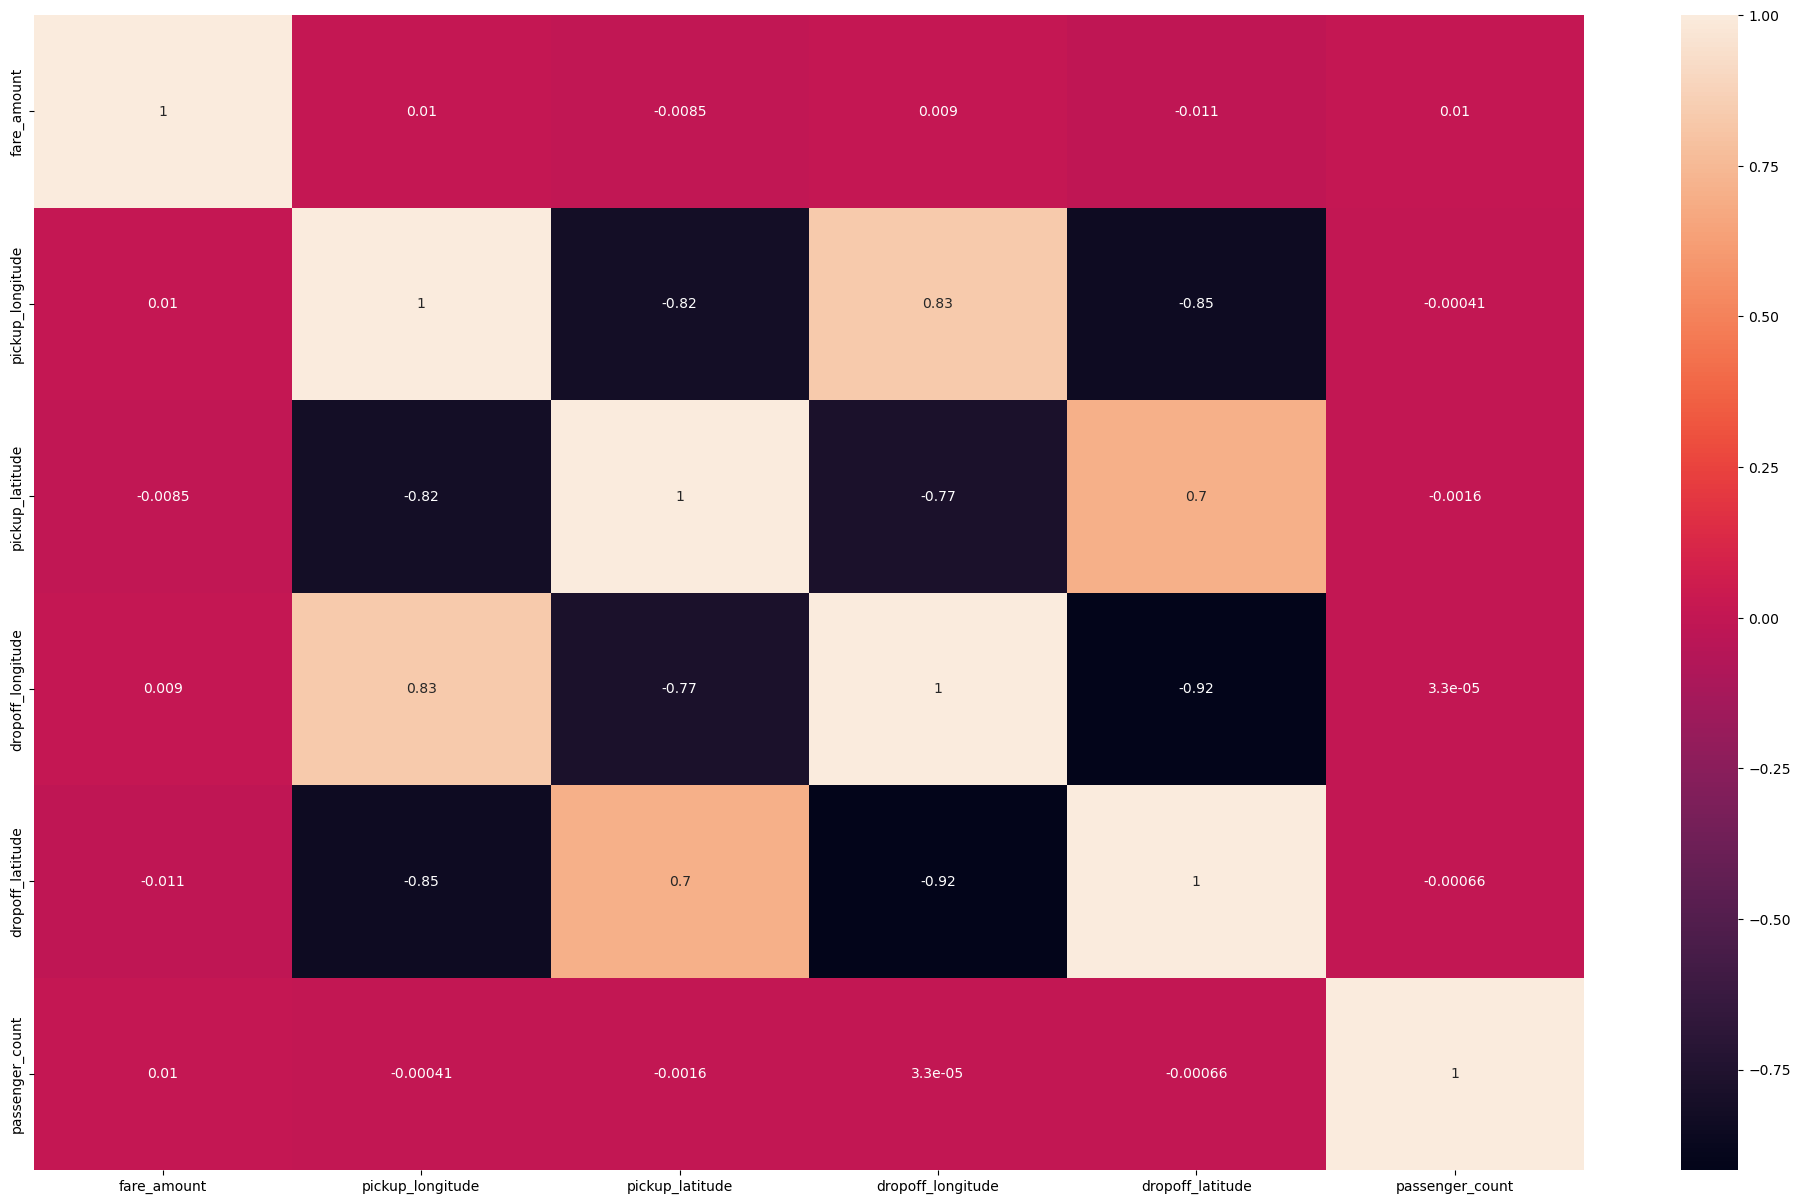

In [16]:
#Correlation matrix
sns.set_style()
plt.figure(figsize=(25,15))
sns.heatmap(a.corr(),annot=True)
plt.show()

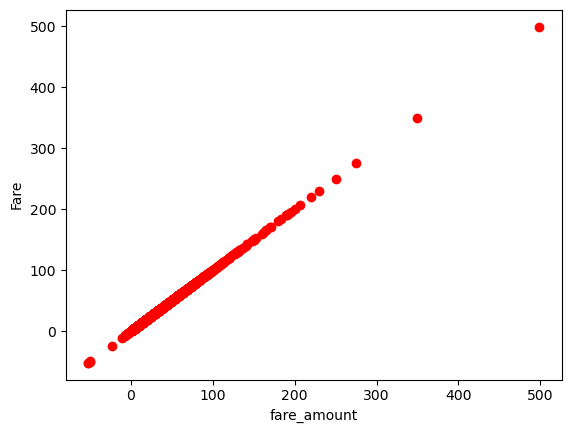

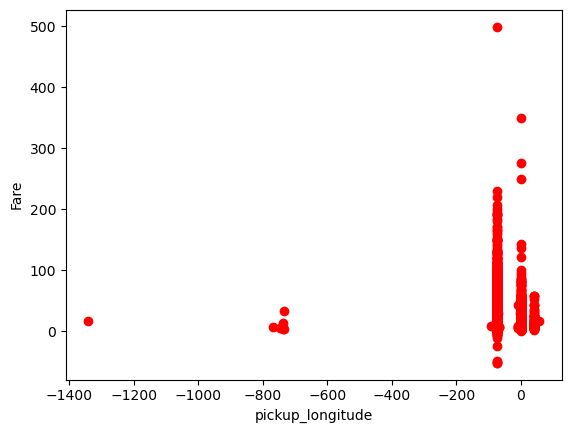

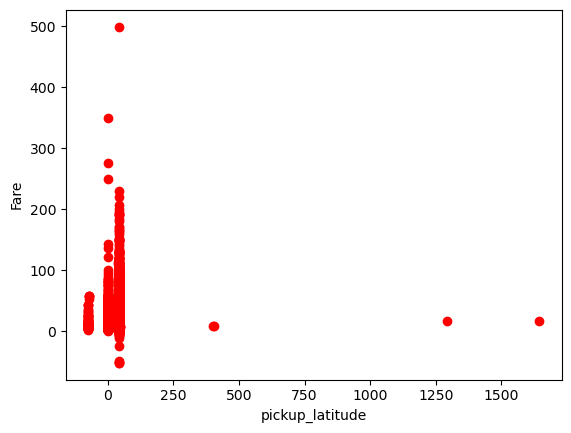

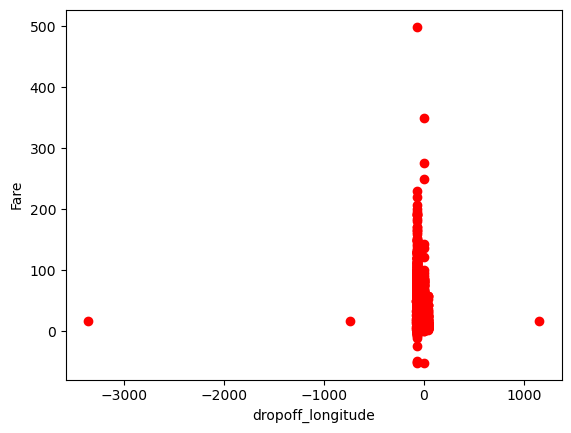

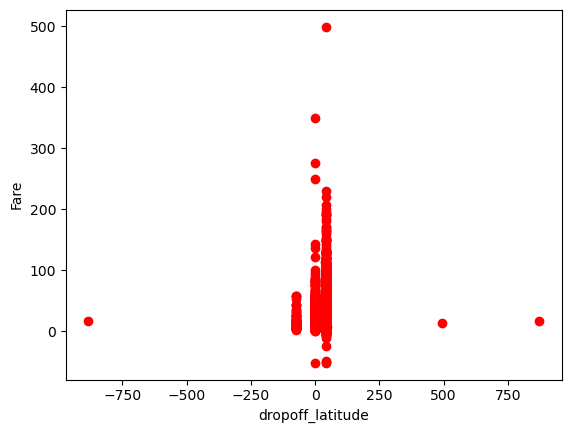

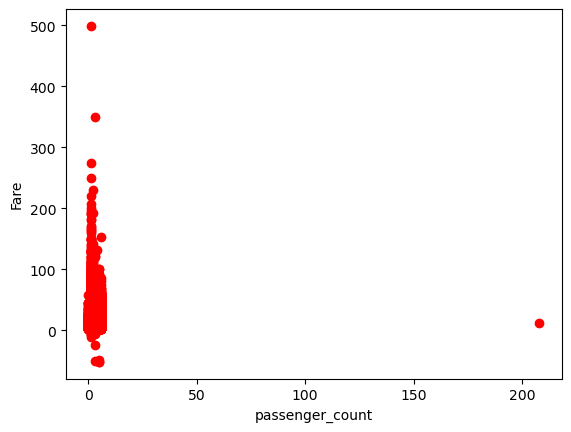

In [17]:
for i in a.columns:
    plt.xlabel(i)
    plt.ylabel("Fare")
    plt.scatter(a[i],a["fare_amount"],color='red')
    plt.show()

In [18]:
# splitting x(inputs) and y(outputs)

x=a.drop(['fare_amount'],axis=1)
y=a["fare_amount"]
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1
199996,-73.984722,40.736837,-74.006672,40.739620,1
199997,-73.986017,40.756487,-73.858957,40.692588,2
199998,-73.997124,40.725452,-73.983215,40.695415,1


In [19]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

In [20]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21269,-73.991475,40.744142,-73.973567,40.761202,1
187660,-73.986658,40.757668,-73.992543,40.740547,1
774,-73.983210,40.734950,-73.953570,40.788012,2
184577,-73.991544,40.750282,-73.979496,40.738285,1
37127,-73.982404,40.723422,-74.000441,40.720880,1
...,...,...,...,...,...
119879,-73.975727,40.755598,-73.972682,40.764690,1
103694,-73.987458,40.750500,-73.983002,40.743627,2
131932,-73.992855,40.758665,-74.001943,40.734407,1
146867,-73.960555,40.757512,-73.958520,40.766328,5


In [21]:
y_train

21269      7.5
187660     5.7
774       16.0
184577     6.9
37127      7.5
          ... 
119879     5.7
103694     6.5
131932    10.5
146867     4.1
121958    10.1
Name: fare_amount, Length: 140000, dtype: float64

In [22]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119737,-73.864754,40.598060,-73.854214,40.601828,1.524318
72272,-6.801492,6.537025,-6.814627,6.428408,2.461861
158154,-73.823843,40.644127,-73.836886,40.634430,2.461861
65426,-73.747360,40.639641,-73.831258,40.661659,1.993090
30074,-73.857266,40.618943,-73.851854,40.616318,1.524318
...,...,...,...,...,...
97771,-73.845252,40.615173,-73.729259,40.589060,1.524318
59813,-73.768686,40.622167,-73.790061,40.611722,1.524318
103735,-73.855828,40.609126,-73.858067,40.640444,1.524318
180226,-73.820537,40.662614,-73.819029,40.681517,1.758704


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [24]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
mean_absolute_percentage_error_lr=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_lr)
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_lr=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_lr)

Mean Absolute Error is 6.758335953905863
Mean Absolute Percentage Error is 2649067393025.599
Mean Squared Error is 106.54223859946747
Root Mean Square Error is 10.321929984235869
r2_score is  -0.024888357056193522


In [25]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_tree=r2_score(y_test,y_pred)
print('r2_score is ',r2_score)
mean_absolute_percentage_error_tree=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_tree)

Mean Absolute Error is 5.965696833333333
Mean Squared Error is 132.577489985
Root Mean Square Error is 11.514229891095626
r2_score is  <function r2_score at 0x7d62d7f094d0>
Mean Absolute Percentage Error is 1523717873927.405


In [26]:
import plotly.graph_objs as go
import plotly.offline as py

x = ['Linear Regression', 'Decision Tree Regressor']
y1 = [mean_absolute_percentage_error_lr,r2_score_lr]
y2 = [mean_absolute_percentage_error_tree,r2_score_tree]

trace1 = go.Bar(x = x, y = y1, name = 'Mean Absolute Percentage Error', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Coefficient of determination', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Performance Evaluation', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)